# Рубежный контроль №1

Студент: Ма Линь   
Группа: ИУ5И-21М  
Вариант: 16  
Задачи: 16, 36  
Дополнительные требования по группам: Диаграмма рассеяния  

# 1. Задача №16

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием преобразования Бокса-Кокса (Box-Cox transformation).

Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.model_selection import train_test_split
color=sns.color_palette()
sns.set_style('darkgrid')
pd.set_option('display.float_format',lambda x: '{:.3f}'.format(x))
%matplotlib inline

In [2]:
data=pd.read_csv('human_development.csv')
df=data.dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 187
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI Rank                                188 non-null    float64
 1   Country                                 188 non-null    object 
 2   Human Development Index (HDI)           188 non-null    float64
 3   Life Expectancy at Birth                188 non-null    float64
 4   Expected Years of Education             188 non-null    float64
 5   Mean Years of Education                 188 non-null    float64
 6   Gross National Income (GNI) per Capita  188 non-null    object 
 7   GNI per Capita Rank Minus HDI Rank      188 non-null    float64
dtypes: float64(6), object(2)
memory usage: 13.2+ KB


,HDI Rank,Country,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank
0,1.000,Norway,0.944,81.600,17.500,12.600,"64,992",5.000
1,2.000,Australia,0.935,82.400,20.200,13.000,"42,261",17.000
2,3.000,Switzerland,0.930,83.000,15.800,12.800,"56,431",6.000
3,4.000,Denmark,0.923,80.200,18.700,12.700,"44,025",11.000
4,5.000,Netherlands,0.922,81.600,17.900,11.900,"45,435",9.000


Просмотрите график рассеяния перед масштабированием

<AxesSubplot:xlabel='Human Development Index (HDI)', ylabel='Expected Years of Education'>

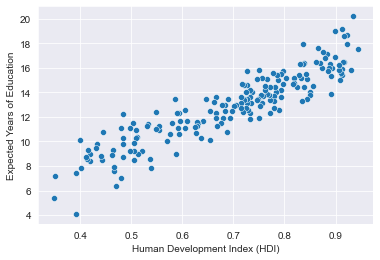

In [3]:
sns.scatterplot(x='Human Development Index (HDI)',y='Expected Years of Education',data=df)

<AxesSubplot:>

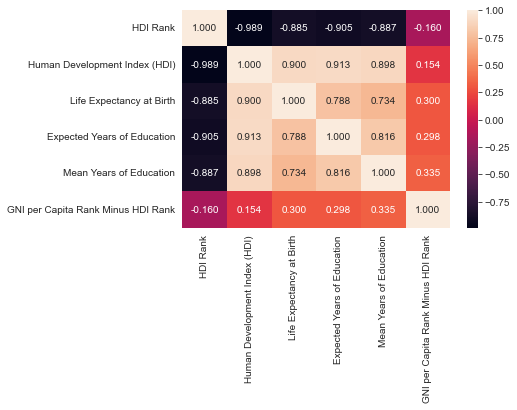

In [4]:
sns.heatmap(data.corr(),annot=True, fmt='.3f')

Преобразование Бокса-Кокса

In [5]:
import scipy.stats as stats

In [6]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot = plt)
    plt.show()

Оптимальное значение λ = 1.1117089263946978


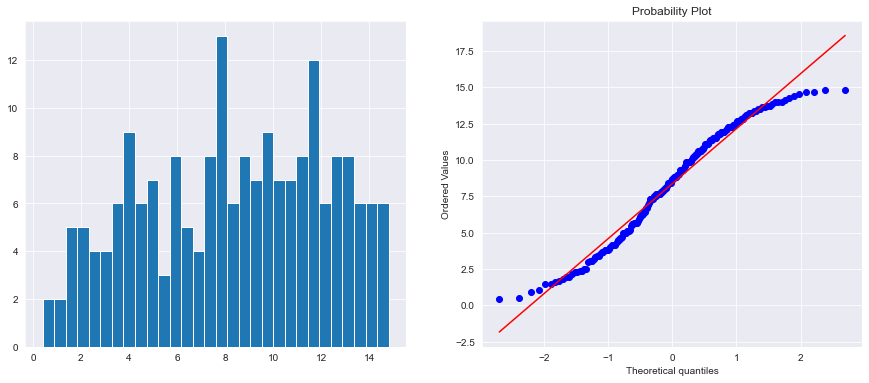

In [7]:
data['Mean Years of Education_boxcox'], param = stats.boxcox(data['Mean Years of Education']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'Mean Years of Education_boxcox')

# 2. Задача №36.

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectKBest для 5 лучших признаков, и метод, основанный на взаимной информации.  
Импортируйте новый набор данных с веб-сайта kaggle. Этот набор данных о качестве очищенной воды

In [8]:
data_2=pd.read_csv('water_potability.csv')
data_2.info()
data_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               99 non-null     float64
 1   Hardness         99 non-null     float64
 2   Solids           99 non-null     float64
 3   Chloramines      99 non-null     float64
 4   Sulfate          99 non-null     float64
 5   Conductivity     99 non-null     float64
 6   Organic_carbon   99 non-null     float64
 7   Trihalomethanes  99 non-null     float64
 8   Turbidity        99 non-null     float64
 9   Potability       99 non-null     int64  
dtypes: float64(9), int64(1)
memory usage: 7.9 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,1.000,204.890,20791.319,7.300,368.516,564.309,10.380,86.991,2.963,0
1,3.716,129.423,18630.058,6.635,1.000,592.885,15.180,56.329,4.501,0
2,8.099,224.236,19909.542,9.276,1.000,418.606,16.869,66.420,3.056,0
3,8.317,214.373,22018.417,8.059,356.886,363.267,18.437,100.342,4.629,0
4,9.092,181.102,17978.986,6.547,310.136,398.411,11.558,31.998,4.075,0


In [9]:
a=data_2.drop(labels=['Turbidity'],axis=1)
b=data_2.Turbidity

In [10]:
a.shape

(99, 9)

Импорт библиотек

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

Text(0, 0.5, 'Взаимная информация')

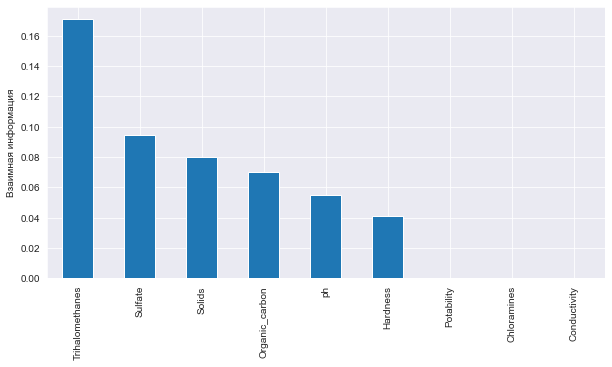

In [12]:
mi = mutual_info_regression(a,b)
mi = pd.Series(mi)
mi.index = a.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')


In [13]:
selector=SelectKBest(mutual_info_regression,k=5)
selector.fit(a,b)
X_selected=selector.transform(a)
X_selected.shape

(99, 5)

In [14]:
selector.get_support(indices=False)

array([ True, False,  True, False,  True, False,  True,  True, False])

In [15]:
a.columns[selector.get_support()]

Index(['ph', 'Solids', 'Sulfate', 'Organic_carbon', 'Trihalomethanes'], dtype='object')

<AxesSubplot:>

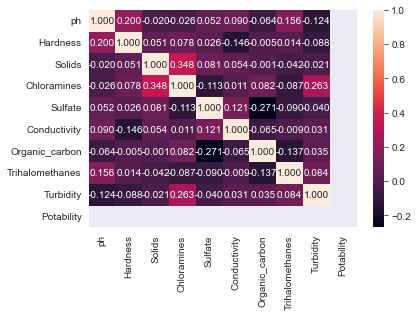

In [16]:
sns.heatmap(data_2.corr(),annot=True, fmt='.3f')